In [1]:
from scipy.stats import multivariate_normal
from scipy.integrate import trapz, simps
import matplotlib as mpl
import numpy as np
import pylab as plt
from scipy.spatial import Delaunay
from scipy.stats import norm

%matplotlib inline

0.9759786294955645 0.9770698418097896
Bayes Error= 0.023475764347322903


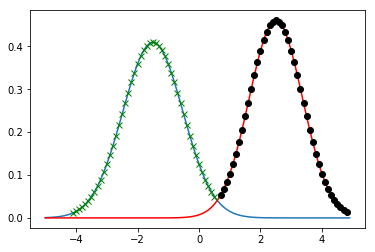

In [8]:
x = np.linspace(-5, 5, 100, endpoint=False)
y0 = np.array(multivariate_normal.pdf(x, mean=-1.5, cov=0.95))
y1 = np.array(multivariate_normal.pdf(x, mean=2.5, cov=0.75))
plt.plot(x, y0);
plt.plot(x, y1,'r');

plt.plot(x[y0>y1+0.01],y0[y0>y1+0.01],'xg')
a0=trapz(y0[y0>y1+0.01], x[y0>y1+0.01])
plt.plot(x[y1>y0+0.01],y1[y1>y0+0.01],'ok')
a1=trapz(y1[y1>y0+0.01], x[y1>y0+0.01])
print(a0,a1)
print('Bayes Error=',1-0.5*(a0+a1))

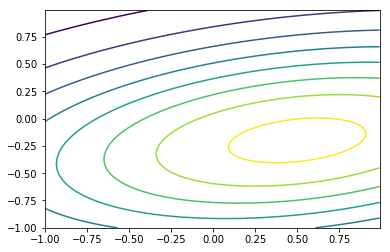

In [9]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv0 = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
plt.contour(x, y, rv0.pdf(pos))

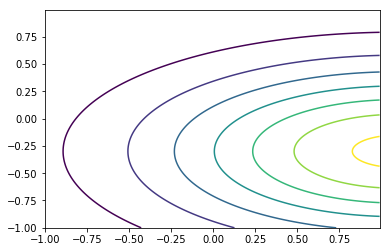

In [36]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv1 = multivariate_normal([1.1, -0.3], [[1.0, 0], [0, 0.3]])
plt.contour(x, y, rv1.pdf(pos))

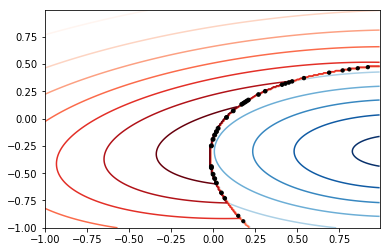

In [37]:
R0=rv0.pdf(pos)
R1=rv1.pdf(pos)

#print (R0-R1)*(R0-R1>0)
plt.contour(x, y,(R1)*(R1-R0>0),cmap='Blues')
plt.contour(x, y,(R0)*(R0-R1>0),cmap='Reds')
plt.scatter(x, y,100*(R1)*(abs(R1-R0)<0.0001),c='k',zorder=20)

In [38]:
import pandas as pd

In [39]:
df=pd.read_csv('../BRCA23.csv',index_col=0)

0.5012978947965723 0.5093324079952372
E= 0.49468484860409534


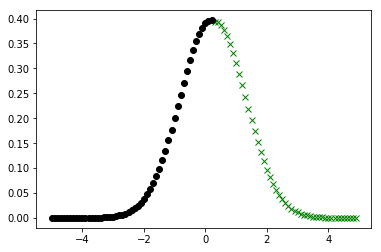

In [43]:
var='t2'
df_=df[['cancer',var]]

t10=df_[df_.cancer==0][var].values
t11=df_[df_.cancer==1][var].values

#interpolate t10 and t11
mu0, std0 = norm.fit(t10)
mu1, std1 = norm.fit(t11)
x = np.linspace(-5, 5, 100, endpoint=False)
y0 = multivariate_normal.pdf(x, mean=mu0, cov=std0)
y1 = multivariate_normal.pdf(x, mean=mu1, cov=std1)

e=0.00000001
plt.plot(x[y0>y1+e],y0[y0>y1+e],'xg')
a0=trapz(y0[y0>y1+e], x[y0>y1+e])
plt.plot(x[y1>y0+e],y1[y1>y0+e],'ok')
a1=trapz(y1[y1>y0+e], x[y1>y0+e])
print(a0,a1)
print('E=',1-0.5*(a0+a1))

In [44]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [46]:
clf.fit(df.drop('cancer',axis=1).values, df.cancer.values)

GaussianNB(priors=None, var_smoothing=1e-09)